In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
#import scipy > used to find mode

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "Pymaceuticals_data_mouse_drug_data.csv"
clinical_trial_data_to_load = "Pymaceuticals_data_clinicaltrial_data.csv"

trial_data = pd.read_csv(mouse_drug_data_to_load)
mouse_data = pd.read_csv(clinical_trial_data_to_load)

merged_data=trial_data.merge(mouse_data, on = "Mouse ID")

merged_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
tumor_mean_volume = merged_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean().reset_index()
tumor_mean_volume


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
tumor_standarderror = merged_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem().reset_index()
tumor_standarderror.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
table_mean_volume = tumor_mean_volume.pivot_table(values ="Tumor Volume (mm3)", index ="Timepoint", columns ="Drug")
table_standarderror = tumor_standarderror.pivot_table(values ="Tumor Volume (mm3)", index ="Timepoint", columns ="Drug")

table_mean_volume



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
table_standarderror


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


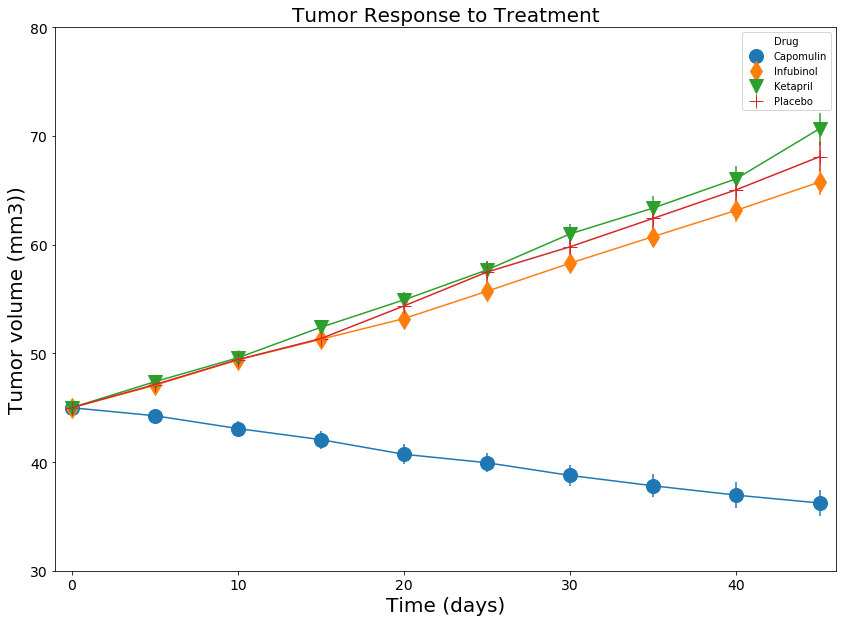

In [6]:
df1 = table_mean_volume[["Capomulin","Infubinol","Ketapril","Placebo"]]
df2 = table_standarderror[["Capomulin","Infubinol","Ketapril","Placebo"]]


ax = df1.plot(figsize=(12,8), yerr = df2, legend = False)

ax.set_prop_cycle(None)

df1.plot(figsize=(14,10), style=['o', 'd', 'v', '+'], markersize=14, ax = ax)

plt.title("Tumor Response to Treatment").set_size(20)
plt.xlabel("Time (days)")
plt.ylabel("Tumor volume (mm3))")
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.xlim(-1, table_mean_volume.index.max() + 1)
plt.ylim(30, 80)


plt.savefig("tumor_response.png")
plt.show()

In [7]:
metastatic_mean = pd.DataFrame(merged_data.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites'])
metastatic_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
metastatic_se = pd.DataFrame(merged_data.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'])
metastatic_se.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
metastatic_mean = metastatic_mean.pivot_table(values ="Metastatic Sites", index ="Timepoint", columns ="Drug")
metastatic_se = metastatic_se.pivot_table(values ="Metastatic Sites", index ="Timepoint", columns ="Drug")
metastatic_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


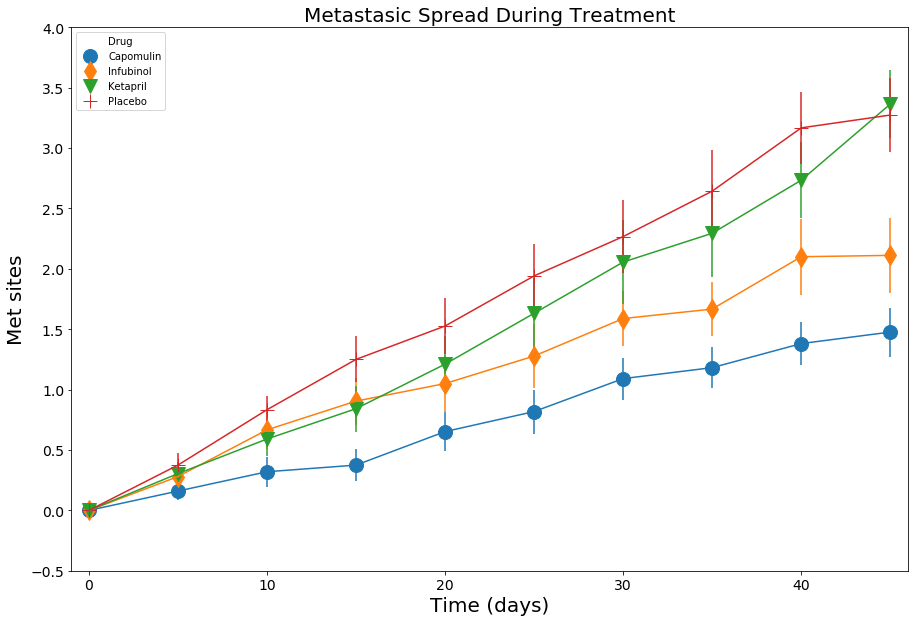

In [11]:
df3 = metastatic_mean[["Capomulin","Infubinol","Ketapril","Placebo"]]
df4 = metastatic_se[["Capomulin","Infubinol","Ketapril","Placebo"]]


ax = df3.plot(figsize=(12,8), yerr = df4, legend = False)
ax.set_prop_cycle(None)
df3.plot(figsize=(15,10), style=['o', 'd', 'v', '+'], markersize=14, ax = ax)

plt.title("Metastasic Spread During Treatment").set_size(20)
plt.xlabel("Time (days)")
plt.ylabel("Met sites")
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.xlim(-1, table_mean_volume.index.max() + 1)
plt.ylim(-0.5, 4)

plt.savefig("Metastatic_spread.png")
plt.show()

In [12]:
mouse_count = merged_data.groupby(["Drug", "Timepoint"])["Mouse ID"].count().reset_index()
mouse_count = mouse_count.rename(columns={"Mouse ID":"Mouse Count"})
mouse_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
mouse_table = mouse_count.pivot_table(values ="Mouse Count", index ="Timepoint", columns ="Drug")

df5 = mouse_table[["Capomulin","Infubinol","Ketapril","Placebo"]]
mouse_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [14]:
df5['Capomulin Survival'] = (df5['Capomulin']/25)*100
df5['Infubinol Survival'] = (df5['Infubinol']/25)*100
df5['Ketapril Survival'] = (df5['Ketapril']/25)*100
df5['Placebo Survival'] = (df5['Placebo']/25)*100
df_survival = df5[['Capomulin Survival', 'Infubinol Survival', 'Ketapril Survival', 'Placebo Survival']]

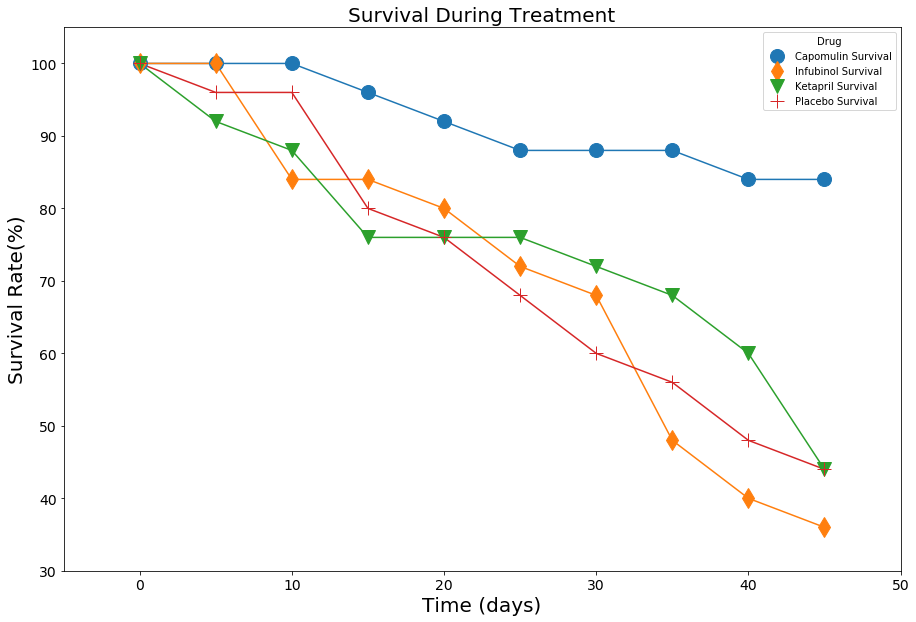

In [15]:
ax = df_survival.plot(figsize=(12,8), legend = False)
ax.set_prop_cycle(None)
df_survival.plot(figsize=(15,10), style=['o', 'd', 'v', '+'], markersize=14, ax = ax)

plt.title("Survival During Treatment").set_size(20)
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate(%)")
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.xlim(-5, 50)
plt.ylim(30, 105)

plt.savefig("survival.png")
plt.show()

In [16]:
tumor_change_percent = (table_mean_volume.loc[45, :] - table_mean_volume.loc[0, :])/table_mean_volume.loc[0, :] * 100
tumor_change_percent

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [17]:
tumor_growth = tumor_change_percent[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
tumor_growth

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

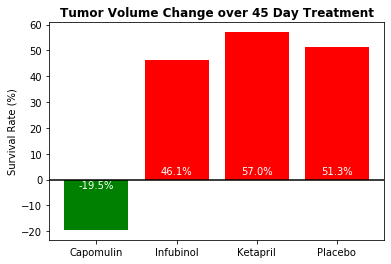

In [18]:
plt.title('Tumor Volume Change over 45 Day Treatment', fontdict = {'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel('Survival Rate (%)')
plt.axhline(y=0, color = 'black')
xlabels = tumor_growth.index
plt.xticks(np.arange(len(xlabels)), xlabels)


plt.bar(np.arange(4), 
        tumor_growth, 
        color = ['red' if tumor_growth[r] > 0 else 'green' for r in np.arange(len(xlabels))]
       )

count = 0

for r in tumor_growth:
    if r < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(r, 1)) + '%', ha = 'center', color = 'white')
    count += 1

plt.savefig("volume_bar.png")
plt.show()